<a href="https://colab.research.google.com/github/pedro-de-bastos/CS166-Modeling-Simulation-and-Decision-Making/blob/main/Pre_Class_Work_CS166_Approximating_PageRank_by_Simulating_Random_Surfing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-Class Work CS166: Approximating PageRank by Simulating Random Surfing 

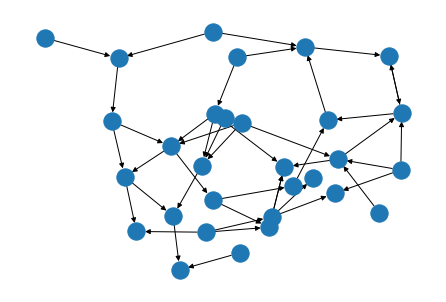

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from sklearn import metrics

g = nx.erdos_renyi_graph(30, 0.05, directed = True, seed = 123)
nx.draw(g, pos = nx.kamada_kawai_layout(g))

In [2]:
def run_sim(steps, alpha):
  g = nx.erdos_renyi_graph(30, 0.05, directed = True, seed = 123)
  for node in g.nodes():
    g.nodes[node]['Tally'] = 0

  new_node = np.random.choice(g.nodes())
  g.nodes[new_node]['Tally'] += 1
  for i in range(steps):
    try:
      if np.random.random() < alpha:
        new_node = np.random.choice(list(nx.neighbors(g, new_node)))
      else:
        new_node = np.random.choice(g.nodes())
      g.nodes[new_node]["Tally"]+=1
    except:
      new_node = np.random.choice(g.nodes())
      g.nodes[new_node]["Tally"]+=1
  return g

def get_error(g, steps):
  approx_pagerank = {}
  for i in graph.nodes():
    approx_pagerank[i] = graph.nodes[i]['Tally']/steps
  real_pagerank = nx.pagerank(graph)
  return np.sqrt(metrics.mean_squared_error(list(approx_pagerank.values()), list(real_pagerank.values())))


In [21]:
steps = list(range(100, 1000, 100))
steps.insert(0, 10)

results = {}
for i in steps:
  results[i] = []
  for j in range(200):
    graph = run_sim(i, 0.85)
    error = get_error(graph, i)
    results[i].append(error)

In [15]:
def get_means_error(results):
  means = {}
  error_95 = {}
  for j in results.keys():
    means[j] = np.mean(results[j])
    error_95[j] = abs(np.mean(results[j]) - np.quantile(results[j], (0.975)))
  return means, error_95

In [47]:
def plot_errorbar(means, error_95):
  eb1 = plt.errorbar(means.keys(), means.values(), yerr = error_95.values(), ecolor = 'black', capsize = 3)
  eb1[-1][0].set_linestyle('--')
  plt.xlabel('Steps')
  plt.ylabel('RMSE')
  plt.show()

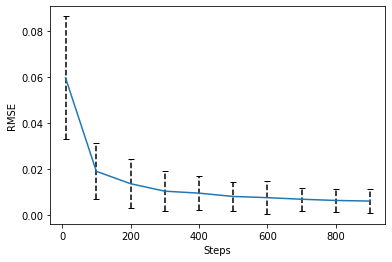

In [48]:
means, error_95 = get_means_error(results)
plot_errorbar(means, error_95)